In [5]:
from dataval.dataset import WeatherDataset
from dataval.plot import violinplot

import matplotlib
import os
import pandas as pd
import seaborn as sns

import wandb

In [7]:
# Keeping the outputs clean
os.environ["WANDB_QUIET"] = "true"

# New W&B Run
run = wandb.init(project = "ml-dataval-course")

In [9]:
ds = WeatherDataset(os.path.join(os.getcwd(), "canonical-partitioned-dataset"))

In [10]:
print(ds.get_partition_keys())

['2018_35', '2018_36', '2018_37', '2018_38', '2018_39', '2018_40', '2018_41', '2018_42', '2018_43', '2018_44', '2018_45', '2018_46', '2018_47', '2018_48', '2018_49', '2018_50', '2018_51', '2018_52', '2019_01', '2019_02', '2019_03', '2019_04', '2019_05', '2019_06', '2019_07', '2019_08', '2019_09', '2019_10', '2019_11', '2019_12', '2019_13', '2019_14']


In [11]:
df = ds.load(ds.get_partition_keys()[0])
df.head()

,fact_time,fact_latitude,fact_longitude,fact_temperature,fact_cwsm_class,climate,topography_bathymetry,sun_elevation,climate_temperature,climate_pressure,...,cmc_0_1_66_0_next,cmc_0_1_67_0_grad,cmc_0_1_67_0_next,cmc_0_1_68_0_grad,cmc_0_1_68_0_next,gfs_2m_dewpoint_grad,gfs_2m_dewpoint_next,gfs_total_clouds_cover_low_grad,gfs_total_clouds_cover_low_next,year_week
0,2018-09-01,-1.650000,13.433333,23.0,20.0,tropical,430.0,-75.638305,22.277857,729.286679,...,0.0,0.0,0.0,0.0,0.0,-0.299713,19.950311,0.0,0.0,2018_35
1,2018-09-01,45.668889,9.700278,16.0,21.0,mild temperate,237.0,-36.779546,19.204286,729.002882,...,0.0,0.0,0.0,0.0,0.0,0.100037,14.150018,13.0,13.0,2018_35
2,2018-09-01,-5.683333,132.750000,28.0,20.0,tropical,-21.0,41.213493,25.817143,758.903685,...,0.0,0.0,0.0,0.0,0.0,-0.600006,21.350000,0.0,0.0,2018_35
3,2018-09-01,47.618599,-52.751900,11.0,20.0,mild temperate,154.0,-18.489419,14.088571,753.774086,...,0.0,0.0,0.0,0.0,0.0,-1.058746,7.594049,0.0,100.0,2018_35
4,2018-09-01,35.533333,35.766667,25.0,0.0,mild temperate,2.0,-35.902113,26.162143,751.406267,...,0.0,0.0,0.0,0.0,0.0,0.182770,22.032770,0.0,0.0,2018_35


In [13]:
wandb.log({"small_sample": wandb.Table(dataframe = df.head())})

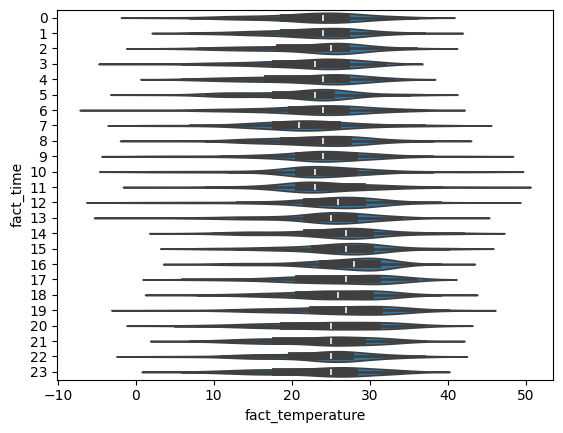

In [15]:
plot = violinplot(df, "fact_temperature", "hour")
wandb.log({"fact_temparature vs hour" : wandb.Image(plot.figure)})

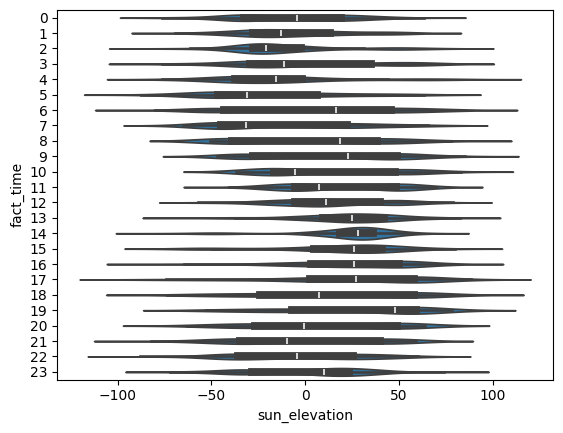

In [16]:
plot = violinplot(df, "sun_elevation", "hour")
wandb.log({"sun_elevation": wandb.Image(plot.figure)})

In [17]:
run.finish()